In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import random

In [25]:
# batch_size = 128
# learning_rate = 1e-3
# num_epochs = 10

# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('data', train=True, download=True,
#                     transform=transforms.ToTensor()),
#     batch_size=batch_size, shuffle=True)
# test_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
#     batch_size=1)


- https://note.com/dngri/n/nd3c415013709

In [26]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [27]:
# 画像にどの様な変形を加えるか
transform = transforms.Compose([
    #Tensor型に
    transforms.ToTensor()
])
train_data = MNIST(root='./data',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='./data',train=False,download=False,transform=ToTensor())
data_loader = torch.utils.data.DataLoader(
    dataset=train_data, 
    batch_size=64,
    # シャッフルしない場合はshuffle=Flase
    shuffle=True,
    # batch_sizeを固定
    drop_last=True
)

In [28]:
len(train_data),len(test_data)
# 画像がそれぞれ60000,枚 10000枚

(60000, 10000)

In [29]:
import cv2
img, label = next(iter(data_loader))
img = np.array(img)[0][0]

cv2.imshow("label.item()", img)
cv2.waitKey(0)

48

<function matplotlib.pyplot.show(close=None, block=None)>

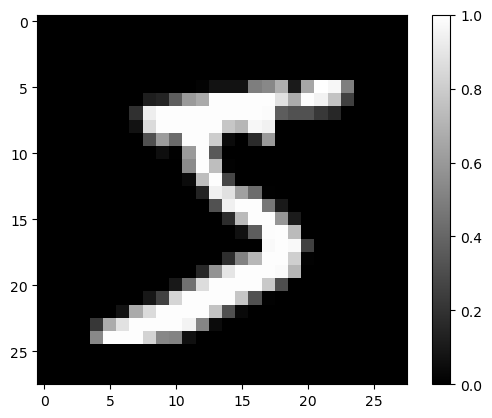

In [30]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0][0].squeeze(),cmap='gray')
plt.colorbar()
plt.show

In [31]:
train_data[0][0].squeeze().shape


torch.Size([28, 28])

In [32]:
fig, label = train_data[0]
print(f'fig shape : {fig.size()}, label : {label}')

fig shape : torch.Size([1, 28, 28]), label : 5


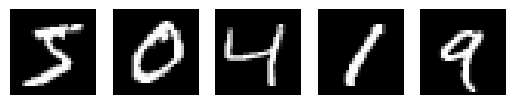

In [33]:
fig, axes = plt.subplots(1, 5)
for i in range(5):
    axes[i].imshow(train_data[i][0].view(-1, 28), cmap='gray')
    axes[i].axis("off")